In [ ]:
//
// Check a Model by Prof. Simizu
//
// Filename: Exp_Gamma_Poisson.stan
//
// これはStanのコードです
// Rのコードではありません
//


data{
  int N;
  int<lower=0> Y[N];
  real<lower=0> alpha;
  real<lower=0> eta;
}

parameters{
  real<lower=0> lambda[N];
  real<lower=0> beta;
}

model{
  target += exponential_lpdf(beta | eta);
  for(i in 1:N){
    target += gamma_lpdf(lambda[i] | alpha, beta);
    target += poisson_lpmf(Y[i] | lambda[i]);
  }
}


モデルおよび記号は，以下の通り

$
Y_i \sim Poi(\lambda_i)　　(i =1,2,...,150)
$

$
\lambda_i \sim Gamma(\alpha, \beta)　　(i = 1,2,...,150)
$

$
\beta \sim Exp(\eta)
$

$
\alpha = 3
$

$
\eta = 1
$

In [1]:
R.Version()$version.string

[1] "R version 4.0.2 (2020-06-22)"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



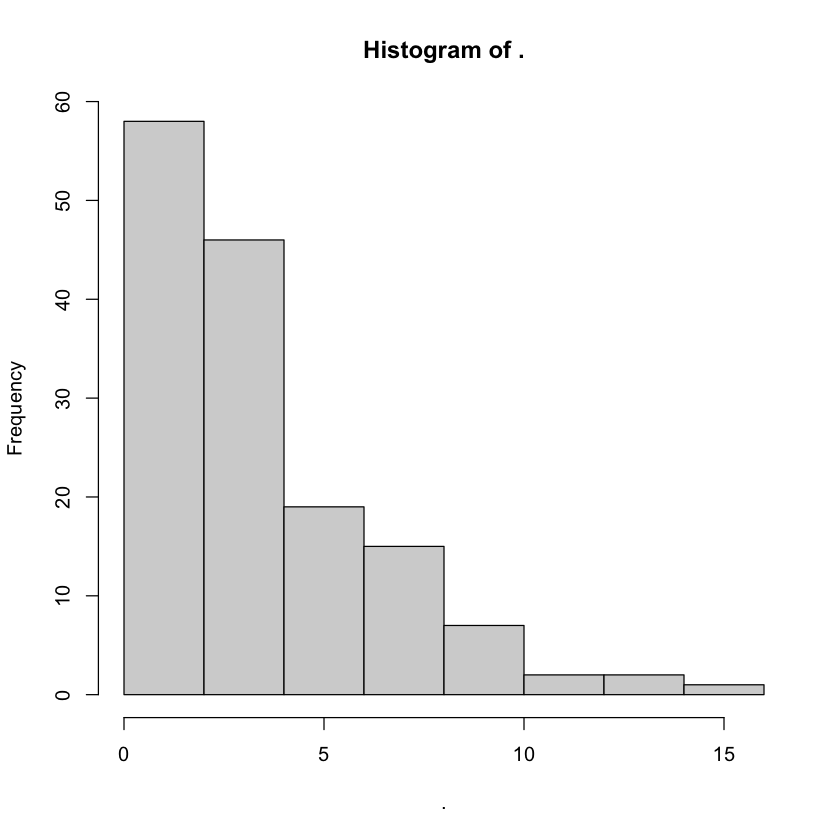

In [2]:
setwd("~/Desktop/stan/Exp_Gamma_Poisson")

library(dplyr)
library(rstan)

### Prof. Shimizu's data 
### https://docs.google.com/presentation/d/e/2PACX-1vSt4olOJtIhAvQYPKo1sEY_8wM-W_YkuFXAjl6PQUdSmm3j4P_PJUc2H7KdgmRYm8VpjivSpvZGYzPa/pub?start=false&loop=false&delayms=3000
N <- 150
set.seed(57)
alpha <- 3
eta <- 1
beta_prime <- 1

Y <- rnbinom(N, size = alpha, prob = 1/(1+beta_prime))
Y %>% hist

In [3]:
stanmodel <- stan_model(file = "Exp_Gamma_Poisson.stan")
fit <- sampling(stanmodel, data = list(Y = Y, N = N, alpha = alpha, eta = eta))
lambda <- rstan::extract(fit)$lambda


SAMPLING FOR MODEL 'Exp_Gamma_Poisson' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.429238 seconds (Warm-up)
Chain 1:                0.391694 seconds (Sampling)
Chain 1:       

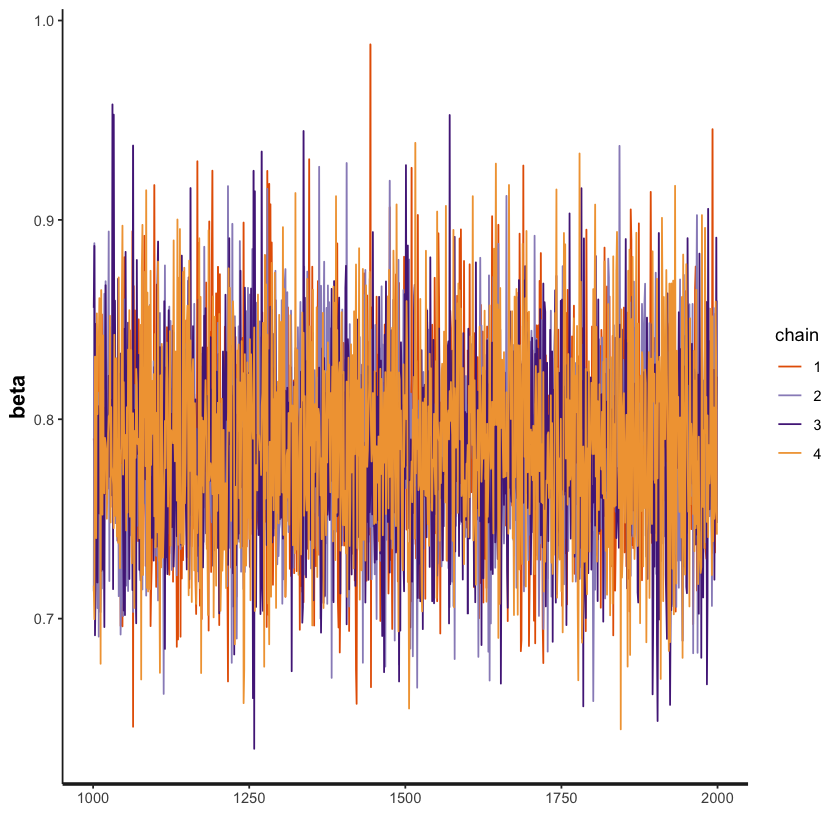

In [4]:
stan_trace(fit, pars=c("beta"))

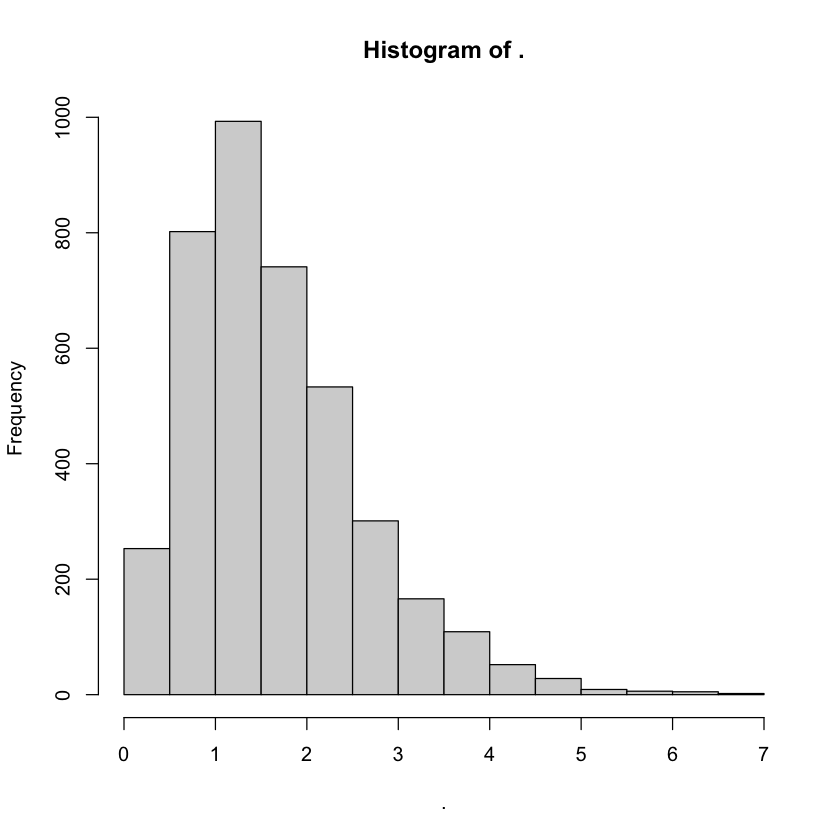

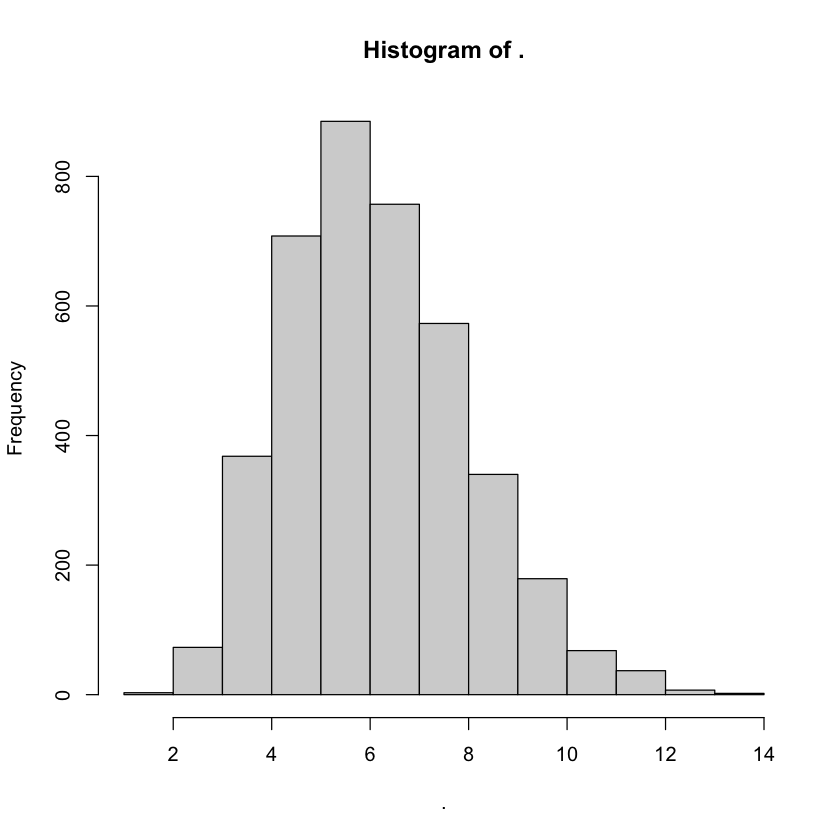

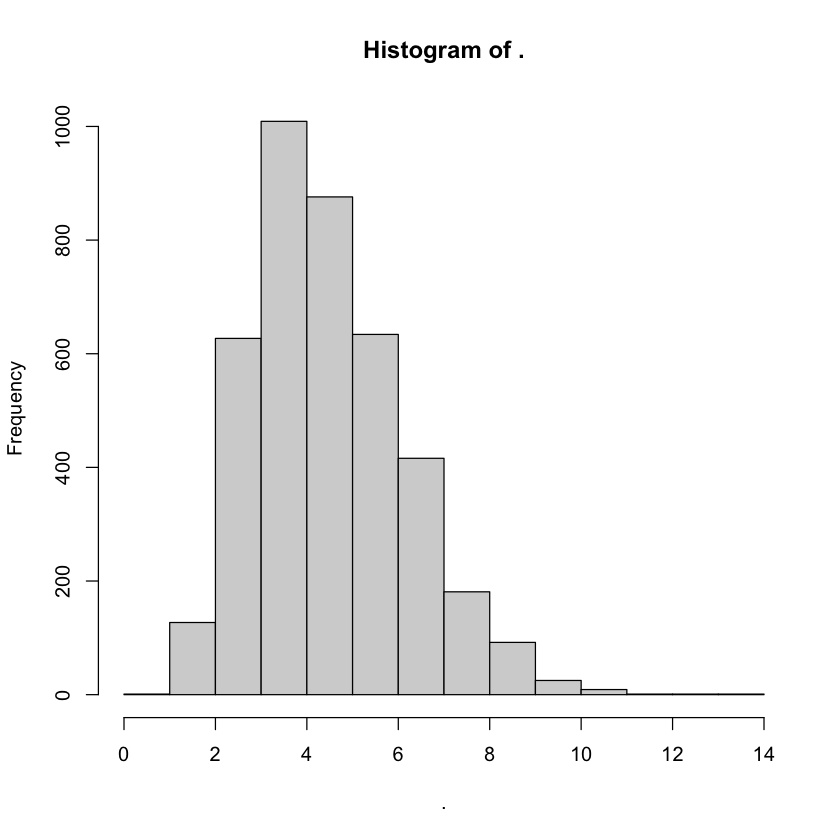

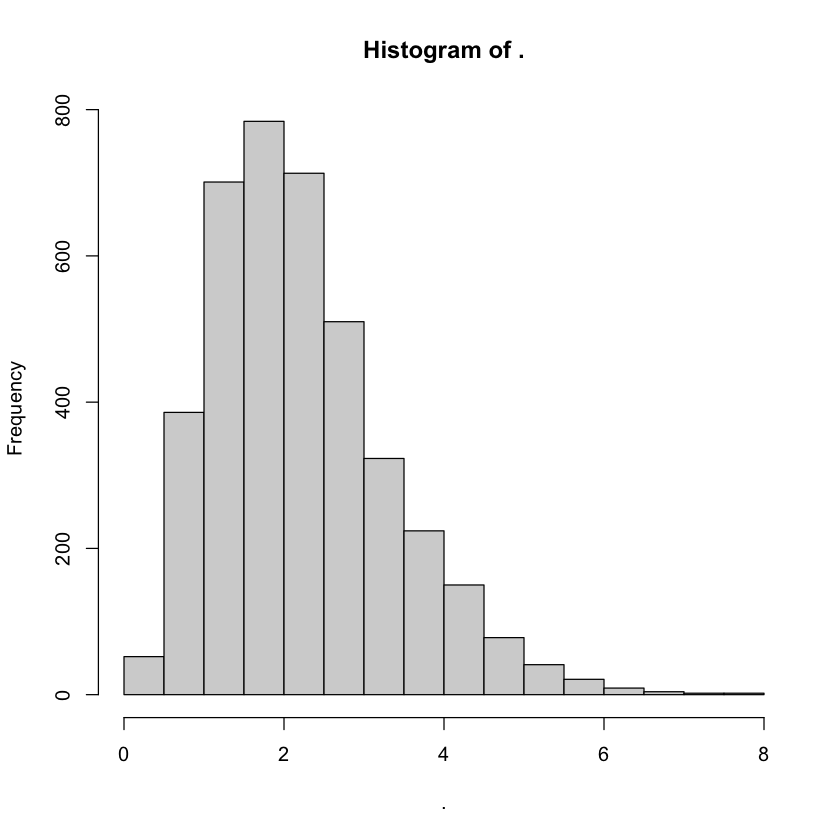

In [5]:
lambda <- rstan::extract(fit)$lambda
## Histogram of the 1st lambda (lambda_1)
lambda[, 1] %>% hist
lambda[, 2] %>% hist
lambda[, 3] %>% hist
lambda[, 4] %>% hist

In [6]:
print(t(rbind(Y, colMeans(lambda))))

        Y          
  [1,]  0  1.667469
  [2,]  8  6.147080
  [3,]  5  4.478333
  [4,]  1  2.227331
  [5,]  1  2.227477
  [6,]  8  6.177969
  [7,]  1  2.270867
  [8,]  1  2.231206
  [9,]  7  5.616384
 [10,]  1  2.271540
 [11,]  7  5.610866
 [12,]  1  2.234522
 [13,]  2  2.796566
 [14,]  3  3.345251
 [15,]  1  2.237413
 [16,]  6  5.050229
 [17,]  3  3.374704
 [18,]  9  6.723718
 [19,]  4  3.921548
 [20,]  7  5.600037
 [21,]  0  1.672550
 [22,]  5  4.478818
 [23,]  1  2.228595
 [24,]  9  6.729963
 [25,]  2  2.793422
 [26,]  5  4.473898
 [27,]  2  2.795464
 [28,]  6  5.050759
 [29,]  0  1.683506
 [30,]  1  2.220812
 [31,]  2  2.787924
 [32,]  1  2.253772
 [33,]  7  5.620909
 [34,]  4  3.932600
 [35,]  0  1.668474
 [36,]  4  3.893077
 [37,]  2  2.796531
 [38,]  1  2.231115
 [39,]  5  4.499763
 [40,]  4  3.926699
 [41,]  2  2.793055
 [42,]  3  3.356980
 [43,] 11  7.881925
 [44,]  7  5.587209
 [45,]  4  3.943226
 [46,]  5  4.511213
 [47,]  3  3.334185
 [48,]  4  3.913734
 [49,]  4  3.941397
